In [2]:
import numpy as np
import os
import re

# Extracting data

In [35]:
st = 'about all also and because but can come could day even find first for from get give have her here him his how into its just know like look make man many more new not now one only other our out people say see she some take tell than that the their them then there these they thing think this those time two use very want was well what when which who will with would year you your'
IGNORED = st.split()

In [44]:
def extract_words(string):
    string = re.sub(r'[^a-zA-Z]', ' ', string)
    string = [word.lower() for word in string.split() if len(word) > 2 \
                                                      and word.lower() not in IGNORED]
    return string

In [116]:
i = 0
for target in os.listdir(books_path):
    path = os.path.join(books_path, target)
    if os.path.isdir(path):
        print(f'{i} => {target}')
        i += 1

0 => Arts
1 => Detectives
2 => Childrens books
3 => Physics
4 => Biology


In [91]:
books_path = '../Big Data/Book data'

vocabulary = set()
data = []
targets = []
i = -1
for target in os.listdir(books_path):
    path = os.path.join(books_path, target)
    if os.path.isdir(path):
        i += 1
        for filename in os.listdir(path):
            if filename.endswith('.txt'):
                filepath = os.path.join(path, filename)
                with open(filepath, 'r') as file:
                    text = file.read()
                    words = extract_words(text)
                    data.append(words)
#                     targets.append(target)
                    targets.append(i)
                    vocabulary |= set(words)
        


In [92]:
vocabulary = sorted(vocabulary)

Each book is turned into a tensor, where which coordinate equals to a number of ocurrences in text of the correspondent word from the vocabulary

In [93]:
from collections import Counter

X = []
for book in data:
    c = Counter(book)
    X.append([c[word] for word in vocabulary])

In [94]:
targets = np.array(targets)

In [53]:
np.array(X).shape

(82, 63918)

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

import seaborn as sns

In [105]:
def visualise(x, colors, name):
    f = plt.figure(figsize=(16, 6))
    f.suptitle(name)

    ax = f.add_subplot()
    palette = np.array(sns.hls_palette(len(set(colors)), l=.6, s=0.9))  
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    ax.axis('tight')
    
    txts = []
    # adding targets to the plot for easier understanding
    for i in range(len(set(colors))):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    plt.show()

In [62]:
from sklearn.decomposition import PCA

In [95]:
pca_result = PCA(n_components=3).fit_transform(X)

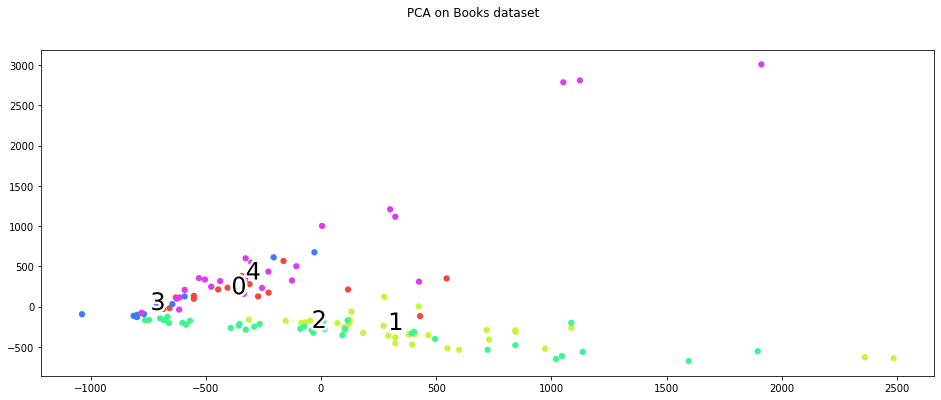

In [106]:
visualise(pca_result[:, :2], targets, 'PCA on Books dataset')

In [70]:
import umap

In [97]:
umap_result = umap.UMAP().fit_transform(X)

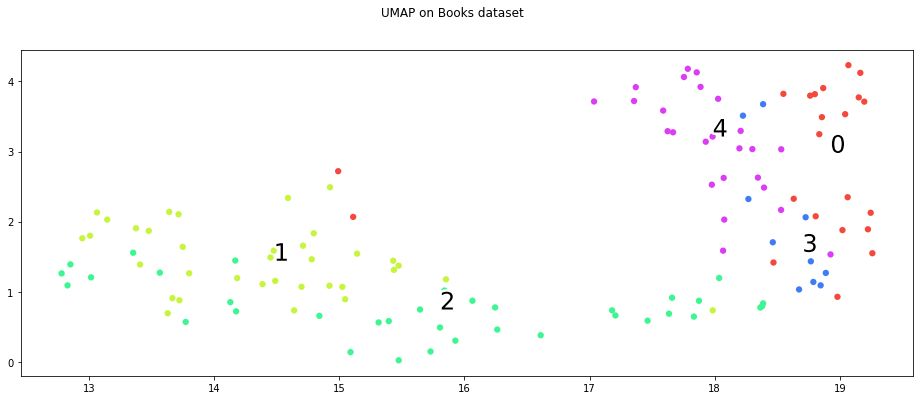

In [107]:
visualise(umap_result, targets, 'UMAP on Books dataset')

In [99]:
umap_result_with_pca = umap.UMAP().fit_transform(pca_result)

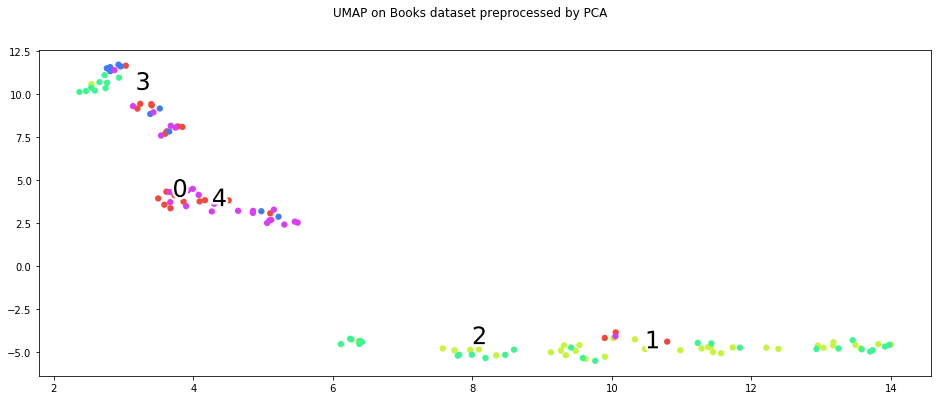

In [108]:
visualise(umap_result_with_pca, targets, 'UMAP on Books dataset preprocessed by PCA')

In [73]:
import sklearn
from sklearn.manifold import TSNE

In [112]:
tsne_result = TSNE().fit_transform(X)

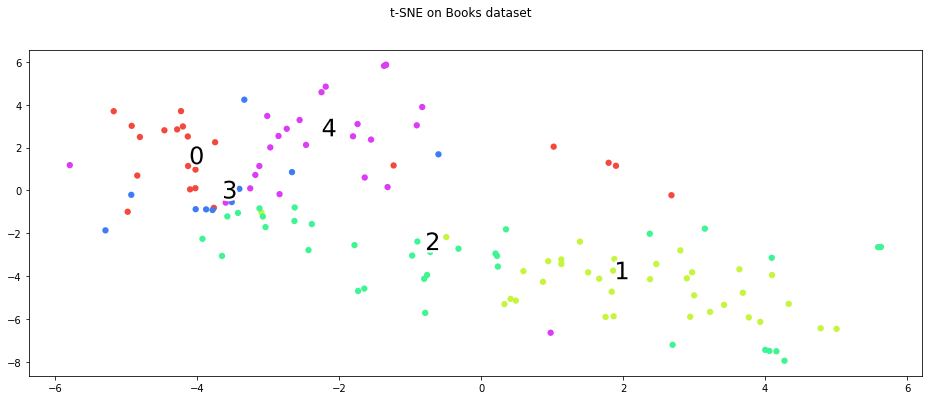

In [113]:
visualise(tsne_result, targets, 't-SNE on Books dataset')

In [114]:
tsne_result_pca = TSNE().fit_transform(pca_result)

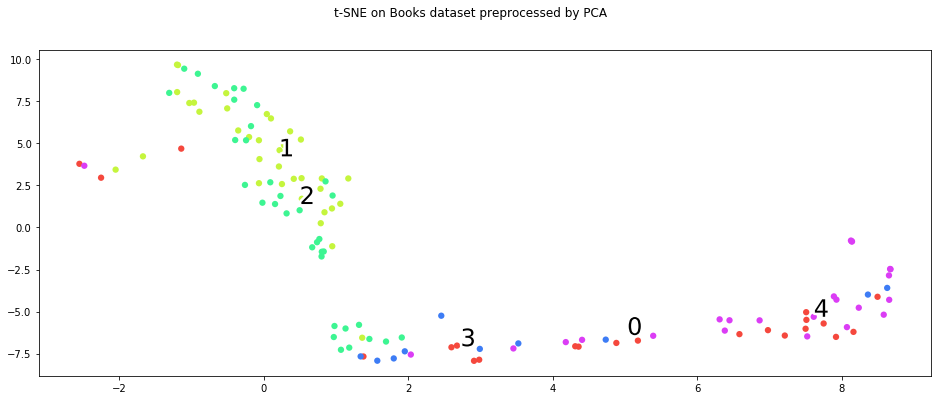

In [115]:
visualise(tsne_result_pca, targets, 't-SNE on Books dataset preprocessed by PCA')